<a href="https://colab.research.google.com/github/NimishSinghChouhan/Smart-Bridge-AI/blob/main/SmartBridge_Day_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

In [7]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_gen = ImageDataGenerator(rescale=(1./255), horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255)) # --> (0 to 355) convert to (0 to 1) - (Normalization)

In [11]:
train = train_gen.flow_from_directory('/content/dataset/Training', target_size=(120,120),class_mode='categorical',batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing', target_size=(120,120),class_mode='categorical',batch_size=8)


Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [12]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [13]:
# CNN - convulational, pooling, flatten, fully connected layer

from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(train,batch_size=8,validation_data=test, epochs=10)

Epoch 1/10
155/155 [==============================] - 22s 71ms/step - loss: 1.3225 - accuracy: 0.5153 - val_loss: 0.9567 - val_accuracy: 0.6564
Epoch 2/10
155/155 [==============================] - 10s 64ms/step - loss: 0.6586 - accuracy: 0.7666 - val_loss: 0.4446 - val_accuracy: 0.8436
Epoch 3/10
155/155 [==============================] - 10s 67ms/step - loss: 0.3658 - accuracy: 0.8788 - val_loss: 0.1870 - val_accuracy: 0.9571
Epoch 4/10
155/155 [==============================] - 11s 68ms/step - loss: 0.2105 - accuracy: 0.9435 - val_loss: 0.1145 - val_accuracy: 0.9755
Epoch 5/10
155/155 [==============================] - 11s 69ms/step - loss: 0.1160 - accuracy: 0.9725 - val_loss: 0.0560 - val_accuracy: 0.9908
Epoch 6/10
155/155 [==============================] - 11s 68ms/step - loss: 0.0820 - accuracy: 0.9847 - val_loss: 0.0266 - val_accuracy: 0.9969
Epoch 7/10
155/155 [==============================] - 11s 68ms/step - loss: 0.0476 - accuracy: 0.9927 - val_loss: 0.0446 - val_accuracy:

In [17]:
model.save('animalWeights.h5')

In [18]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [20]:
img = image.load_img('/content/elephant.jpeg',target_size=(120,120))

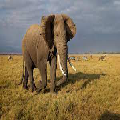

In [21]:
img

In [22]:
img = image.img_to_array(img)
img

array([[[138., 151., 168.],
        [138., 151., 168.],
        [138., 151., 168.],
        ...,
        [134., 144., 156.],
        [134., 144., 156.],
        [134., 144., 156.]],

       [[134., 146., 162.],
        [134., 146., 162.],
        [134., 146., 162.],
        ...,
        [155., 165., 177.],
        [150., 160., 172.],
        [150., 160., 172.]],

       [[134., 143., 158.],
        [134., 143., 158.],
        [134., 143., 158.],
        ...,
        [159., 169., 181.],
        [158., 168., 180.],
        [158., 168., 180.]],

       ...,

       [[ 62.,  38.,   4.],
        [142., 114.,  74.],
        [139., 106.,  52.],
        ...,
        [ 50.,  38.,  16.],
        [ 43.,  28.,   5.],
        [ 50.,  34.,   9.]],

       [[ 89.,  65.,  29.],
        [147., 118.,  74.],
        [140., 108.,  49.],
        ...,
        [ 54.,  41.,  22.],
        [ 53.,  38.,  17.],
        [ 60.,  44.,  21.]],

       [[125.,  97.,  57.],
        [151., 120.,  73.],
        [137., 1

In [23]:
img = np.expand_dims(img,axis=0)
img

array([[[[138., 151., 168.],
         [138., 151., 168.],
         [138., 151., 168.],
         ...,
         [134., 144., 156.],
         [134., 144., 156.],
         [134., 144., 156.]],

        [[134., 146., 162.],
         [134., 146., 162.],
         [134., 146., 162.],
         ...,
         [155., 165., 177.],
         [150., 160., 172.],
         [150., 160., 172.]],

        [[134., 143., 158.],
         [134., 143., 158.],
         [134., 143., 158.],
         ...,
         [159., 169., 181.],
         [158., 168., 180.],
         [158., 168., 180.]],

        ...,

        [[ 62.,  38.,   4.],
         [142., 114.,  74.],
         [139., 106.,  52.],
         ...,
         [ 50.,  38.,  16.],
         [ 43.,  28.,   5.],
         [ 50.,  34.,   9.]],

        [[ 89.,  65.,  29.],
         [147., 118.,  74.],
         [140., 108.,  49.],
         ...,
         [ 54.,  41.,  22.],
         [ 53.,  38.,  17.],
         [ 60.,  44.,  21.]],

        [[125.,  97.,  57.],
       

In [24]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 127ms/step


2